In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #to show the plots in UI

#Modules

In [76]:
df_train = pd.read_csv('train.csv')

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df_train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum Sale Price is more than zero. Since value has to be always we would like to predict by keepinf in the mind that we never get a negative value.


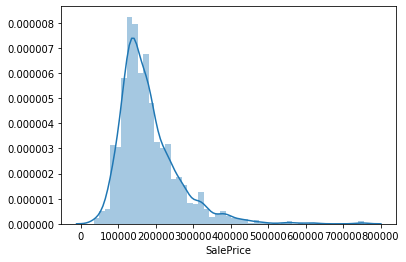

In [15]:
#Plot histogram for distribution
sns.distplot(df_train['SalePrice'])

The distribution deviates from normal deviation and right skewed. We can observe sharp peak in the plot also.

In [19]:
#The skewness and kurtosis of the 'SalePrice'

print('The skewness in the variable SalePrice is {:.3f}'.format(df_train['SalePrice'].skew()))
print('The kurtosis measure in the variable SalePrice is {:.3f}'.format(df_train['SalePrice'].kurt()))


The skewness in the variable SalePrice is 1.883
The kurtosis measure in the variable SalePrice is 6.536


In [21]:
#Next we will look into other variables from description which we assume may have some affect on the price

#first 'OverallQual'
df_train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

(-0.5, 9.5, 0, 800000)

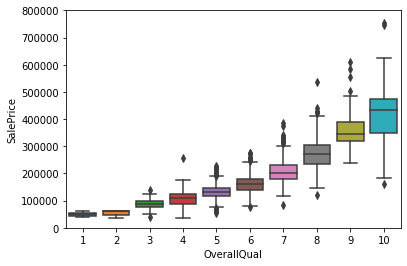

In [22]:
#SalePrice and OverallQual
df = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)
fig.axis(ymin = 0, ymax = 800000)

Though the OverallQual is a int datatype but instead of using it as numerical variable we can use it a categorical type. As there seems to be an exponential increase in the price with the increse in the Overall Qual (Though how did they calculated this feature is unknown).

(-0.5, 111.5, 0, 800000)

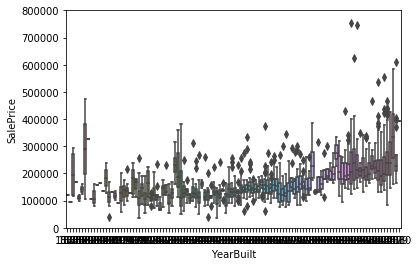

In [23]:
#SalePrice and YearBuilt
df1 = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
#Sizing of the graph
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df1)
fig.axis(ymin = 0, ymax = 800000)

There is no sharp increase in the sales price with the increase in the number of years. There is gradual increase in the sales price.

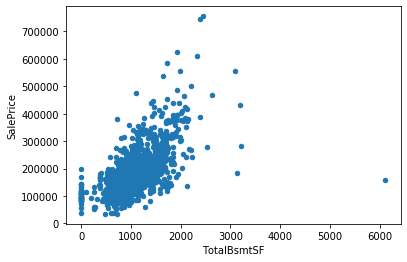

In [26]:
#Sales price and TotalBsmtSF(Total square feet of basement area)
df2 = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
#Scatter plot
df2.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

There is an linear(exponential may be) increase in the Sale Price with increase in the basement area which many buyers look for. However there is an outlier which is 6000 total basement area with less Sale price. Four records with the above 3000 area have lesser sale price.

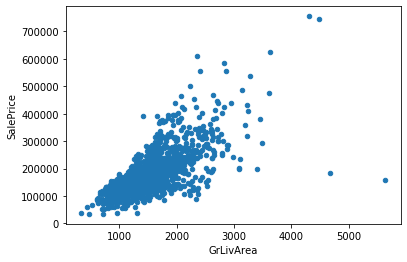

In [27]:
#Sale Price and GrLivArea ( Above grade ground living area)
df3 = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
#scatter plot
df3.plot.scatter(x = 'GrLivArea', y = 'SalePrice')


There is linear increase in sale price with increase in the area above ground. Both living area above ground and basement area might be correlated which would lead to bias in the modelling.

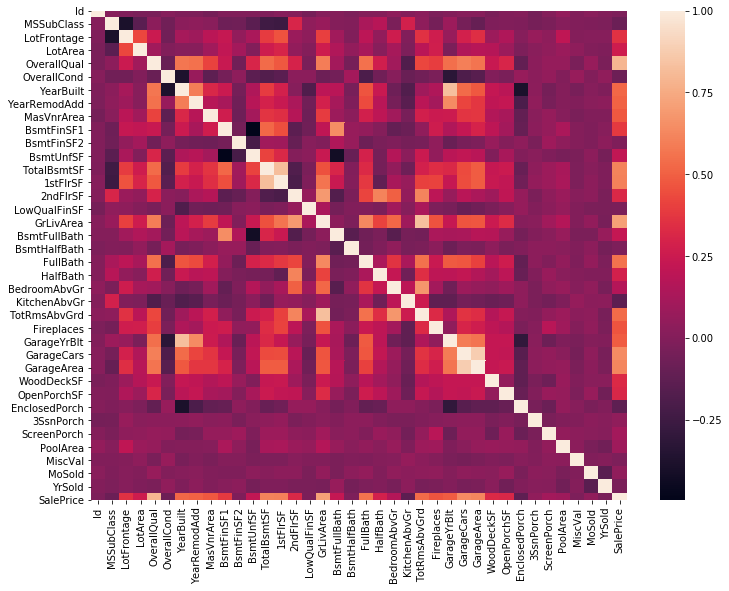

In [28]:
#Correlation plot of the numerical features
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr)

In [38]:
#To see the redundant features which might cause multicollinearity
sol = (corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol[0:10])

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
dtype: float64


The top four feature pairs contain the redundant features which can be taken out while fitting the model to avoid problems due to multicollinearity.

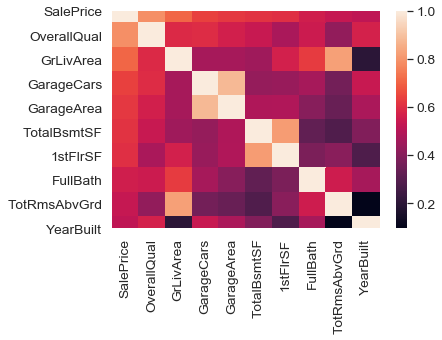

In [44]:
#To see the features which are correlated to Sale Price
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
#From series provides k largest value index
corr_mat = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(corr_mat, yticklabels = cols, xticklabels = cols)


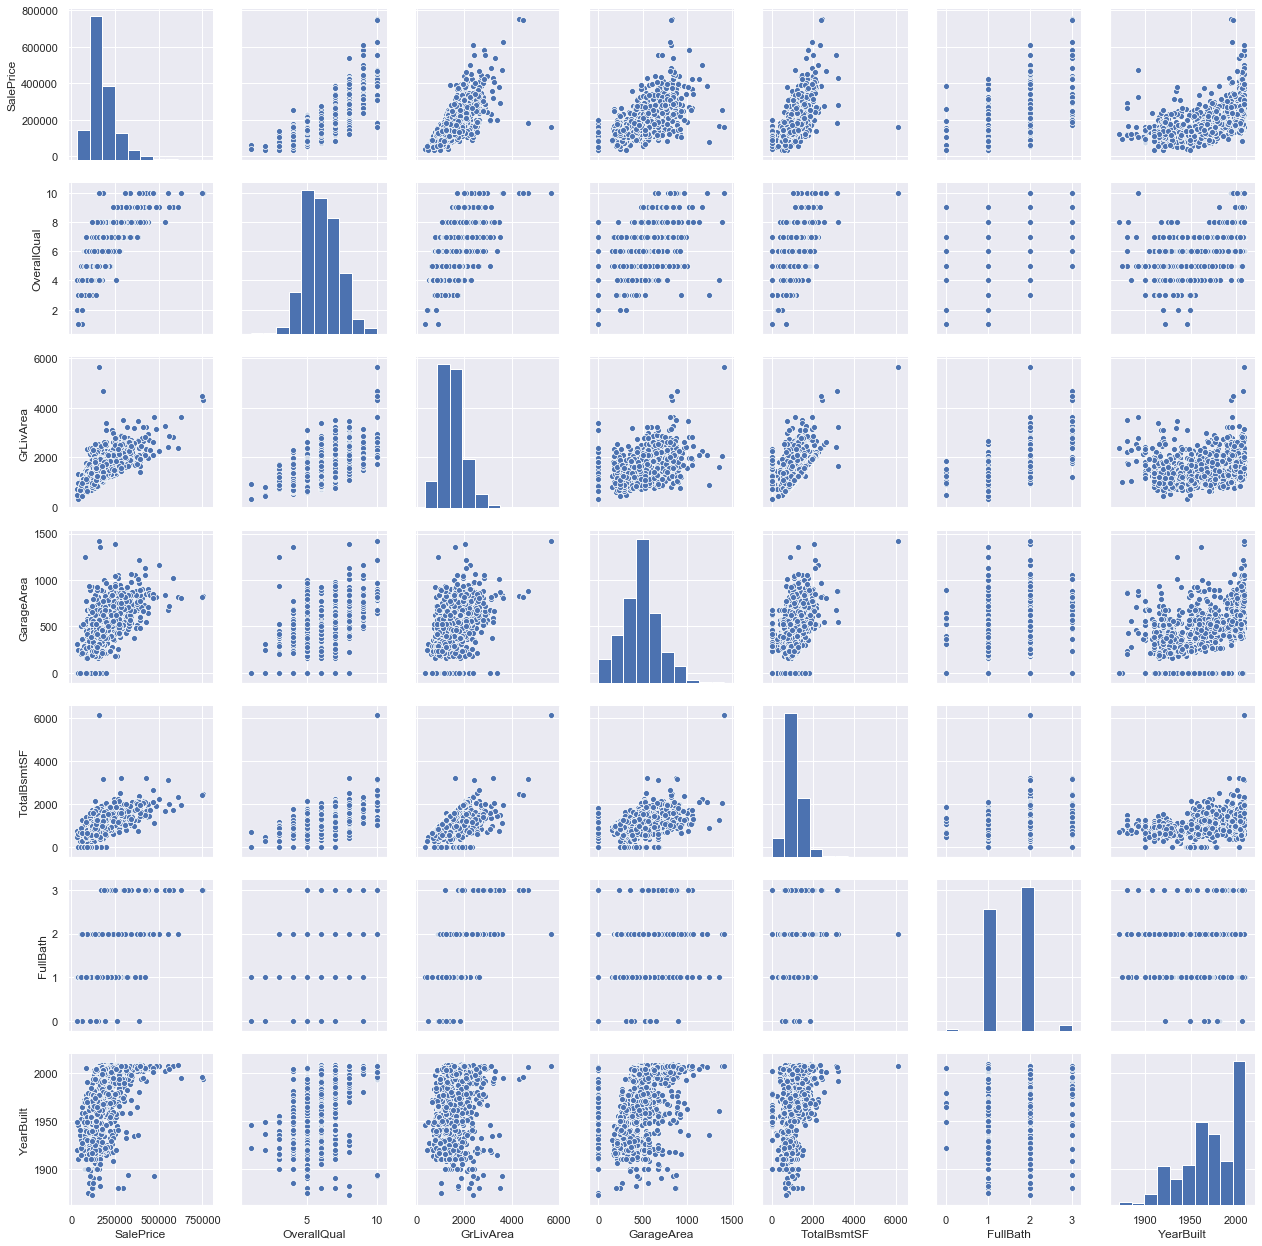

In [55]:
ncols = ['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

sns.set()
sns.pairplot(df_train[ncols], height = 2.5)
plt.show()


Full bath is the only categorical feature with some positive correlation with the Sale Price. Interestingly, TotalBsmtSF and GrLiveArea creates a pattern where most of the records are below a straight line.... These might cause some biasness in the model. 

In [60]:
#Get the missing data in the train data

total_null = df_train.isnull().sum().sort_values(ascending=False)
#df_train.isnull().sum() group by null values in each column and then sum them and save them as series indexed by the column name

percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[0:20]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In this case, any feature with more than 15% of the missing data can be removed for analysis (there are only 1460 observations). Also the features which we might be excluding do not show good correlation with the Sale Price. The Garage variables that are missing are similar data (Thats why all are missing 81) Since the Garage Area or Garage Car plays a stronger relation with Sale Price as compared to the other Garage features we might can exclude these features as well. Same case with the Basement features.

For the electrical feature we can remove one record instead of filling with a value.

For Masonry features two things can be done. Either delete the 8 records(which is only 0.5% of the total data) or fill the values.


C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mmalhotra\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

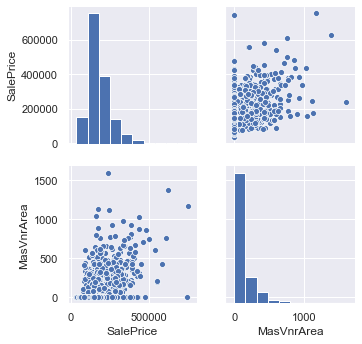

In [64]:
#Masonry Area histogram
sns.set()
sns.pairplot(df_train[['SalePrice', 'MasVnrArea']], height = 2.5)
plt.show

The feature MasVnrArea shows a Poisson distibution with 60% of the data being zeroes. We can fill the missing data with zero becuase it will not change the distribution as such. Further it will be better if we look the importance of the feature while fitting the model.

In [68]:
#Percent of zeroes in MasVnrArea
per = (df_train['MasVnrArea'] == 0).astype(int).sum()/df_train.shape[0]
per

0.5897260273972603

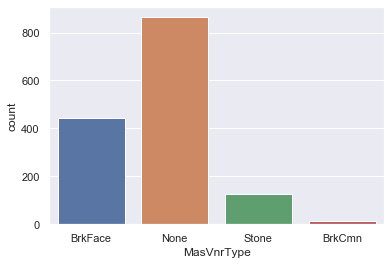

In [73]:
sns.countplot(df_train['MasVnrType'])

Similar to Area, type has around 60% of the data being None, referring they dont have mason veneer. Here also we can replace the null values with None.

In [77]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [81]:
#For dropping one observation with null electrical value
df_train.loc[df_train['Electrical'].isnull()].index 

Int64Index([], dtype='int64')

In [80]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

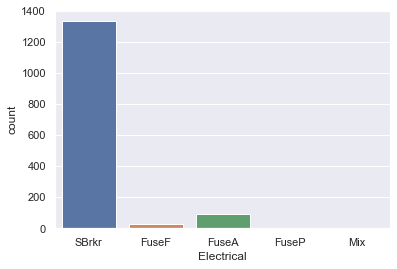

In [82]:
sns.countplot(df_train['Electrical'])

In [87]:
#Get the column names from missing_data using index then drop those columns (axis = 1) from df_train
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index,1)


In [88]:
#To check if there is any null value or not
df_train.isnull().sum().max()

0

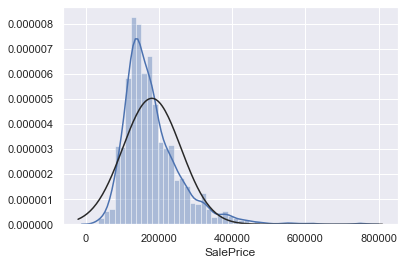

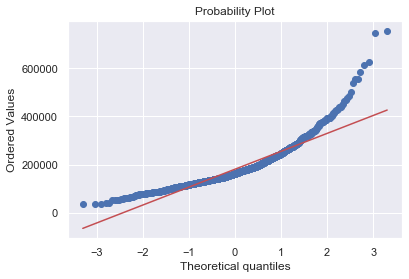

In [95]:
#Histogram and QQ plot for sales price to check normality
from scipy.stats import norm
import scipy.stats

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = sc.stats.probplot(df_train['SalePrice'], plot = plt)


The sale price is skewed in the distribution plot. Also the Probability plot is not a straight line but curved. Convert the sale price into log transformation.


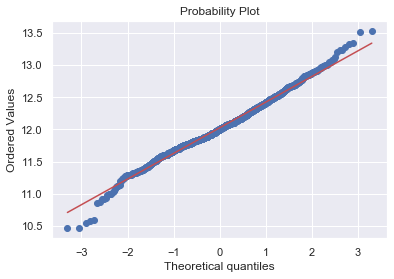

In [97]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#plot again the probability plot
fig = plt.figure()
res = sc.stats.probplot(df_train['SalePrice'], plot = plt)

There are some values which do not lie on the straight line. Can be outliers